In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
def PlotHisto(topic, sInput):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Uncertainty'].isin(sInput.keys())].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sInput)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [4]:
def PlotCompare(topic, leftLegned=(1,1), rightLegend=(1,0.2)):
    dfPlot = df.sort_values('Input Uncertainty')
    if 'Value Diff' not in dfPlot.columns:
        dfPlot['Value Diff'] = df['Mean']/df['Value'] - 1
    if 'Uncertainty Diff' not in dfPlot.columns:
        dfPlot['Uncertainty Diff'] = df['Deviation']/df['Uncertainty'] - 1

    fig, ax = plt.subplots()
    ax.set_title('Sampled vs Variance Arithmetic for ' + topic)
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    ax.set_xscale('log')
    ax.set_ylabel('Sampled vs Variance Arithmetic Error Ratio')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Value Diff'], f'g-', label='Mean vs Value')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Uncertainty Diff'], f'b-', label='Deviation vs Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    ax2.plot(dfPlot['Input Uncertainty'], dfPlot['Normalized Error Deviation'], f'm--', label='Error Deviation')

    ax.grid(True)
    ax.legend(bbox_to_anchor=leftLegned)
    ax2.legend(bbox_to_anchor=rightLegend)

In [5]:
def PlotEdge(valueFunc, topic, xLabel, leftLegned=(1.1,1), rightLegend=(1.1,0.2), sigma=0):
    fig, ax = plt.subplots()
    ax.set_title(f'Largest $\delta x$ for {topic}')
    ax.set_xlabel(xLabel)
    #ax.set_xscale('log')
    ax.set_ylabel(r'Largest $\delta x$')
    ax.grid(True)
    ax.plot(df['Edge Value'], df['Edge Uncertainty'], f'k-', label=r'Largest $\delta x$')
    if sigma:
            ax.plot(df['Edge Value'], df['Edge Value']/sigma, f'k--', label=r'$1/\sigma = 0.2$')

    ax2 = ax.twinx()
    ax2.set_ylabel('Uncertainty')
    ax2.plot(df['Edge Value'], df['Value'] - valueFunc(df['Edge Value']), c='gray', ls='--', label='Uncertainty Bias')
    ax2.plot(df['Edge Value'], df['Uncertainty'], c='gray', ls='-', label='Uncertainty')

    ax.legend(bbox_to_anchor=leftLegned)
    ax2.legend(bbox_to_anchor=rightLegend)

# Convergence Edge

## Power

In [6]:
df = pd.read_csv("../Python/Output/PowerAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-6.0,0.154,1.894753,6.702057,NotMonotonicException: 1.000000e+00~1.550e-01*...
1,-5.9,0.155,1.873142,6.520754,NotMonotonicException: 1.000000e+00~1.560e-01*...
2,-5.8,0.156,1.851388,6.335856,NotMonotonicException: 1.000000e+00~1.570e-01*...
3,-5.7,0.157,1.829521,6.147839,NotMonotonicException: 1.000000e+00~1.580e-01*...
4,-5.6,0.158,1.807566,5.957194,NotMonotonicException: 1.000000e+00~1.590e-01*...


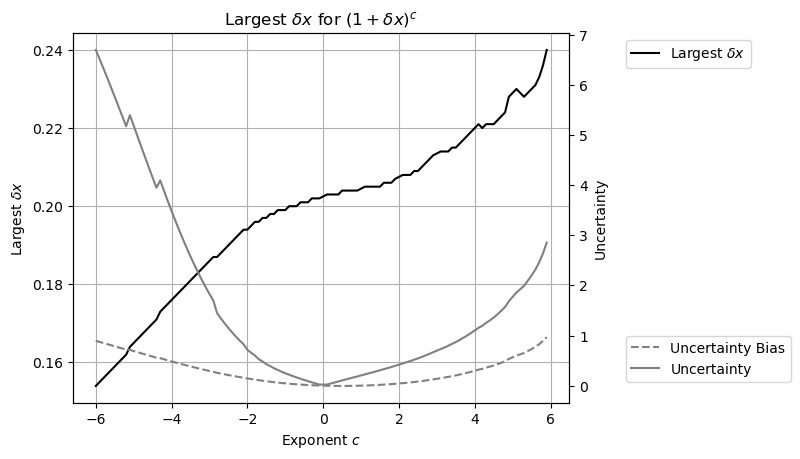

In [7]:
PlotEdge(lambda edgeVal: 1, topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$')

In [51]:
df = pd.read_csv("../Java/Output/PowerAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-6.0,0.154,1.894787,6.733063,Type.NotMonotonicException
1,-5.9,0.155,1.873176,6.551142,Type.NotMonotonicException
2,-5.8,0.156,1.851423,6.365573,Type.NotMonotonicException
3,-5.7,0.157,1.829555,6.176838,Type.NotMonotonicException
4,-5.6,0.158,1.807601,5.985428,Type.NotMonotonicException


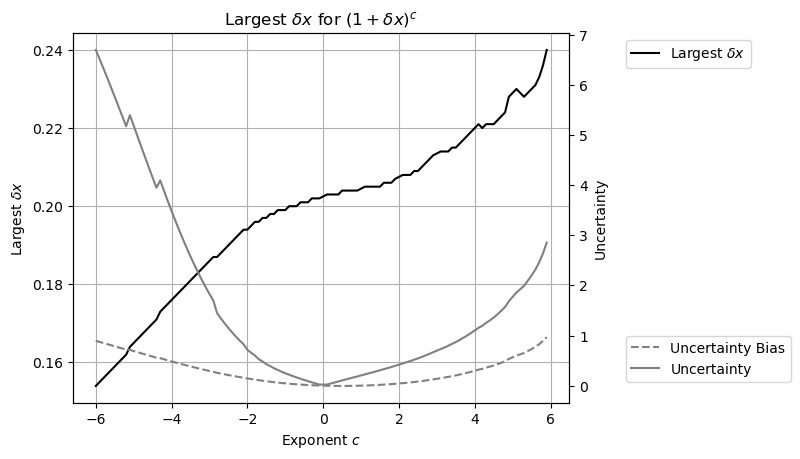

In [48]:
PlotEdge(lambda edgeVal: 1, topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$')

In [52]:
df = pd.read_csv("../Cpp/Output/PowerAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,ExceptionType,Order
0,-5.98,0.154,1.88613,6.59329,NotMonotonicException,20
1,-5.96,0.154,1.87755,6.45701,NotMonotonicException,20
2,-5.94,0.155,1.89051,6.83764,NotMonotonicException,20
3,-5.92,0.155,1.88180,6.69255,NotMonotonicException,20
4,-5.90,0.155,1.87318,6.55114,NotMonotonicException,20


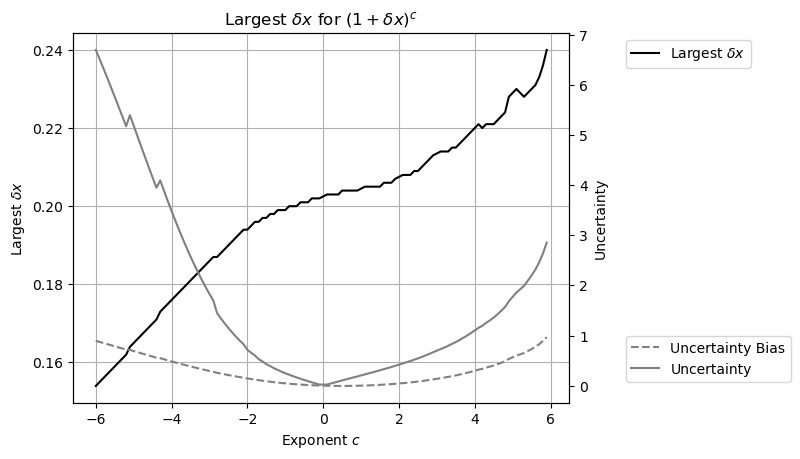

In [50]:
PlotEdge(lambda edgeVal: 1, topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$')

## Sin

In [12]:
df = pd.read_csv("../Python/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-3.141593,1.00,-7.427862e-17,0.657520,NotReliableException: sin(-3.141593e+00~1.010e...
1,-2.945243,1.01,-1.171451e-01,0.652858,NotReliableException: sin(-2.945243e+00~1.020e...
2,-2.748894,1.04,-2.228298e-01,0.640081,NotReliableException: sin(-2.748894e+00~1.050e...
3,-2.552544,1.13,-2.934024e-01,0.631689,NotReliableException: sin(-2.552544e+00~1.140e...
4,-2.356194,1.41,-2.616826e-01,0.656903,NotReliableException: sin(-2.356194e+00~1.420e...


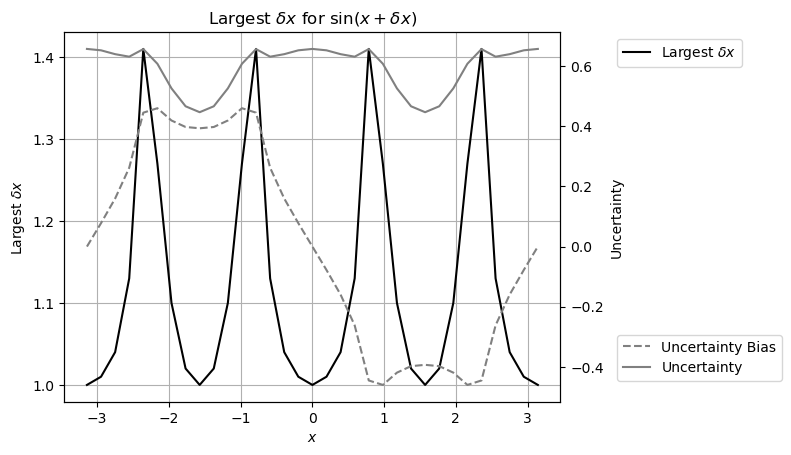

In [13]:
PlotEdge(lambda edgeVal: np.sin(edgeVal), topic=r'$\sin(x + \delta x)$', xLabel=r'$x$')

In [14]:
df = pd.read_csv("../Java/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-3.141593,1.00,-7.427862e-17,0.657520,Type.NotReliableException
1,-2.945243,1.01,-1.171451e-01,0.652858,Type.NotReliableException
2,-2.748894,1.04,-2.228298e-01,0.640081,Type.NotReliableException
3,-2.552544,1.13,-2.934024e-01,0.631689,Type.NotReliableException
4,-2.356194,1.41,-2.616826e-01,0.656903,Type.NotReliableException


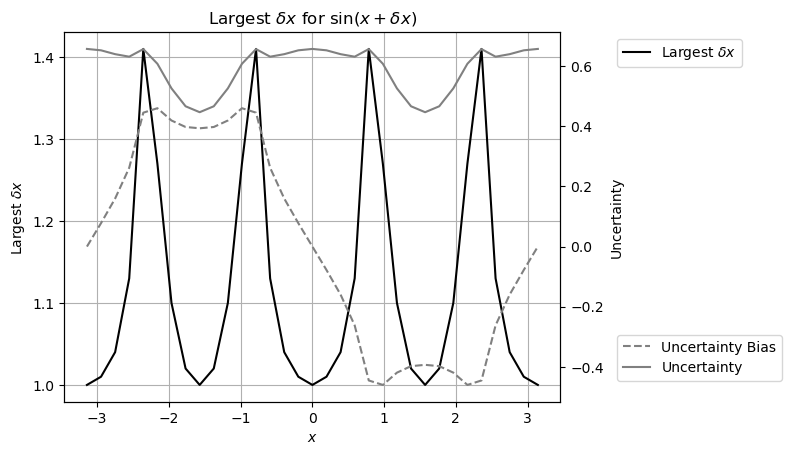

In [15]:
PlotEdge(lambda edgeVal: np.sin(edgeVal), topic=r'$\sin(x + \delta x)$', xLabel=r'$x$')

## Log

In [53]:
df = pd.read_csv("../Python/Output/LogEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,0.0625,0.01,-2.785929,0.165687,NotMonotonicException: log(6.250000e-02~2.000e...
1,0.1250,0.02,-2.092782,0.165687,NotMonotonicException: log(1.250000e-01~3.000e...
2,0.1875,0.03,-1.687317,0.165687,NotMonotonicException: log(1.875000e-01~4.000e...
3,0.2500,0.05,-1.407704,0.212005,NotMonotonicException: log(2.500000e-01~6.000e...
4,0.3125,0.06,-1.182761,0.202419,NotMonotonicException: log(3.125000e-01~7.000e...


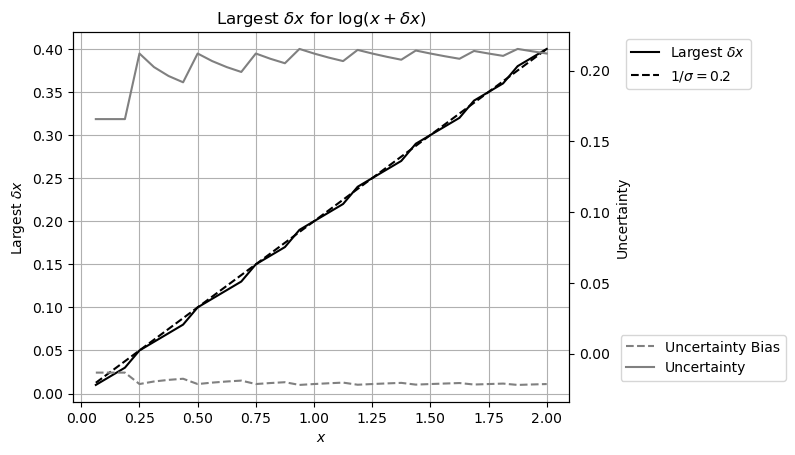

In [54]:
PlotEdge(lambda edgeVal: np.log(edgeVal), topic=r'$\log(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.45,0.2), sigma=5)

In [55]:
df = pd.read_csv("../Java/Output/LogEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,0.0625,0.01,-0.01334,0.165687,Type.NotMonotonicException
1,0.1250,0.02,-0.01334,0.165687,Type.NotMonotonicException
2,0.1875,0.03,-0.01334,0.165687,Type.NotMonotonicException
3,0.2500,0.05,-0.02141,0.212005,Type.NotMonotonicException
4,0.3125,0.06,-0.01961,0.202419,Type.NotMonotonicException


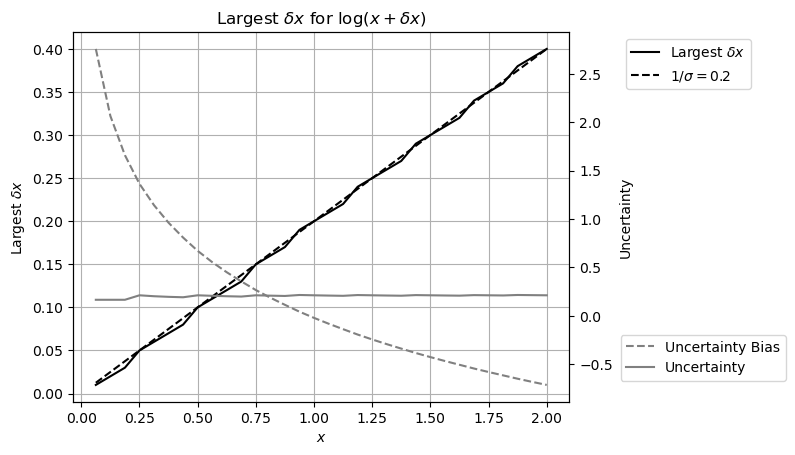

In [56]:
PlotEdge(lambda edgeVal: np.log(edgeVal), topic=r'$\log(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.45,0.2), sigma=5)

# Power

## Square

In [22]:
df = pd.read_csv("../Python/Output/SquareAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,0,0.0001,9.999857e-09,1.414086e-08,1.005914e-08,1.421925e-08,0.004192,1.005543,0,...,0.018483,0.015303,0.013197,0.010304,0.009221,0.007279,0.006236,0.005111,0.004539,0.001993
1,2,0,0.0010,9.999857e-07,1.414086e-06,1.001835e-06,1.418076e-06,0.001308,1.002822,0,...,0.018565,0.015231,0.012837,0.010188,0.008367,0.006976,0.005871,0.005421,0.004286,0.001698
2,2,0,0.0100,9.999857e-05,1.414086e-04,1.002008e-04,1.410429e-04,0.001430,0.997414,0,...,0.017798,0.015630,0.013269,0.009793,0.009016,0.006921,0.006042,0.005316,0.004702,0.001697
3,2,0,0.1000,9.999857e-03,1.414086e-02,9.991438e-03,1.417907e-02,-0.000595,1.002702,0,...,0.018665,0.015494,0.012283,0.010033,0.008509,0.007159,0.006269,0.005011,0.004306,0.001902
4,2,0,1.0000,9.999857e-01,1.414086e+00,9.996144e-01,1.403745e+00,-0.000263,0.992687,0,...,0.018405,0.015051,0.012863,0.010429,0.009080,0.007208,0.006452,0.004755,0.004172,0.001687


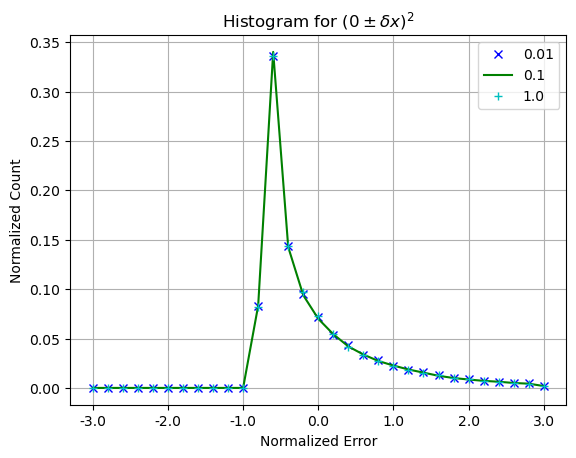

In [23]:
PlotHisto(topic=r'$(0 \pm \delta x)^2$', sInput={0.01: 'bx', 0.1: 'g-', 1: 'c+'})

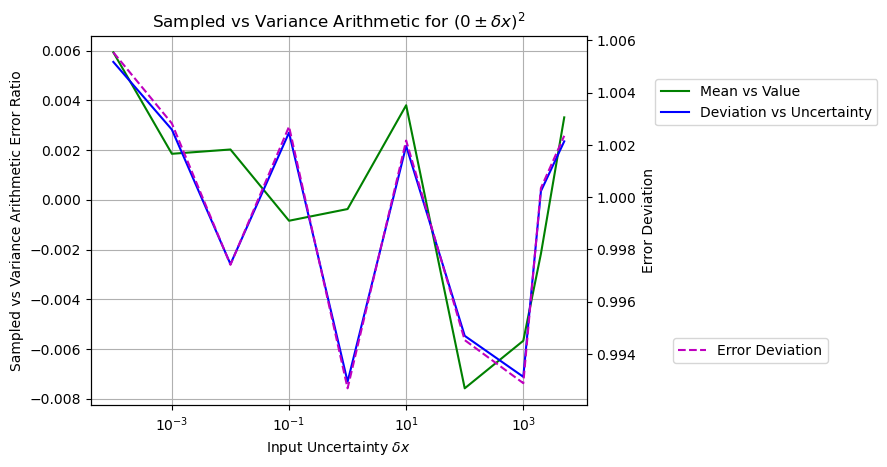

In [24]:
PlotCompare(topic=r'$(0 \pm \delta x)^2$', leftLegned=(1.6,0.9), rightLegend=(1.5,0.2))

In [25]:
df['Normalized Error Deviation'].describe()

count    10.000000
mean      0.999345
std       0.004628
min       0.992687
25%       0.995252
50%       1.001258
75%       1.002614
max       1.005543
Name: Normalized Error Deviation, dtype: float64

## Inversion

In [26]:
df = pd.read_csv("../Python/Output/InversionAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,-1,1,0.1990,1.045691,0.247109,1.045007,0.244852,-0.002769,0.990864,0,...,0.024037,0.018929,0.015220,0.010985,0.008887,0.007114,0.005006,0.004226,0.003425,0.001378
1,-1,1,0.1000,1.010316,0.104291,1.010178,0.104381,-0.001323,1.000864,1,...,0.032352,0.025009,0.019127,0.015018,0.011432,0.008662,0.006406,0.004653,0.003465,0.001279
2,-1,1,0.0001,1.000000,0.000100,0.999999,0.000100,-0.005441,0.998990,137,...,0.037902,0.030071,0.021709,0.015452,0.011090,0.007300,0.004302,0.002808,0.001624,0.000511
3,-1,1,0.0002,1.000000,0.000200,1.000000,0.000200,-0.000250,0.998459,118,...,0.038460,0.030339,0.022949,0.015671,0.010708,0.007209,0.004371,0.002737,0.001634,0.000491
4,-1,1,0.0005,1.000000,0.000500,1.000000,0.000500,-0.000137,1.000948,130,...,0.038431,0.030209,0.021978,0.015491,0.011480,0.007379,0.004632,0.002747,0.001634,0.000501


In [27]:
df['Input Uncertainty'].unique()

array([1.99e-01, 1.00e-01, 1.00e-04, 2.00e-04, 5.00e-04, 1.00e-03,
       2.00e-03, 5.00e-03, 1.00e-02, 2.00e-02, 5.00e-02])

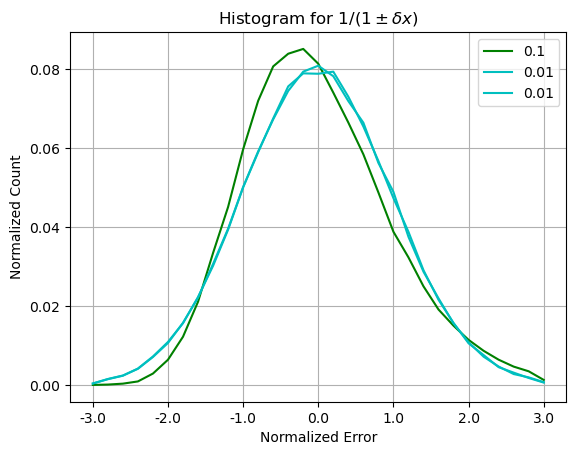

In [28]:
PlotHisto(topic=r'$1/(1 \pm \delta x)$', sInput={0.1999871: 'b-', 0.1: 'g-', 0.01: 'c-'})

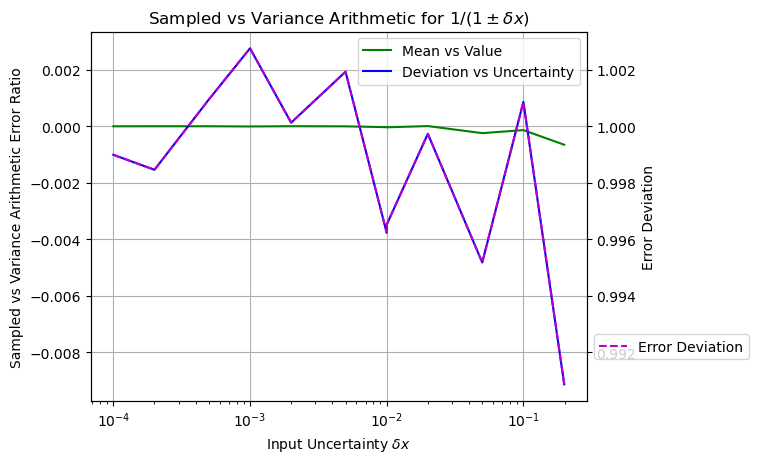

In [29]:
PlotCompare(topic=r'$1/(1 \pm \delta x)$')

## Square Root

In [30]:
df = pd.read_csv("../Python/Output/SquareRootAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.5,1,0.0001,1.0,0.00005,1.000000,0.000050,-0.006730,1.001022,147,...,0.037533,0.030085,0.022416,0.015799,0.011198,0.006586,0.004471,0.002867,0.001734,0.000451
1,0.5,1,0.0002,1.0,0.00010,0.999999,0.000100,-0.005643,0.997845,120,...,0.038926,0.028440,0.021944,0.016300,0.010366,0.007298,0.004451,0.002556,0.001744,0.000591
2,0.5,1,0.0005,1.0,0.00025,1.000002,0.000250,0.007304,1.001896,143,...,0.038596,0.029448,0.022768,0.016088,0.011143,0.007131,0.004624,0.003230,0.001765,0.000562
3,0.5,1,0.0010,1.0,0.00050,1.000000,0.000503,-0.000487,1.005190,139,...,0.038902,0.030026,0.022966,0.015876,0.011132,0.007030,0.004714,0.002778,0.001595,0.000491
4,0.5,1,0.0020,1.0,0.00100,0.999999,0.001000,-0.000277,0.999889,133,...,0.038995,0.031325,0.021658,0.015933,0.011240,0.006748,0.004693,0.002838,0.001504,0.000411


In [31]:
df['Input Uncertainty'].unique()

array([1.00e-04, 2.00e-04, 5.00e-04, 1.00e-03, 2.00e-03, 5.00e-03,
       1.00e-02, 2.00e-02, 5.00e-02, 2.03e-01, 2.00e-01, 1.00e-01])

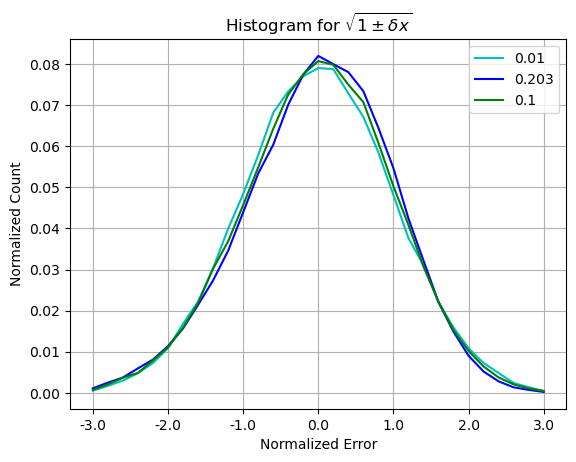

In [32]:
PlotHisto(topic=r'$\sqrt{1 \pm \delta x}$', sInput={0.203: 'b-', 0.1: 'g-', 0.01: 'c-'})

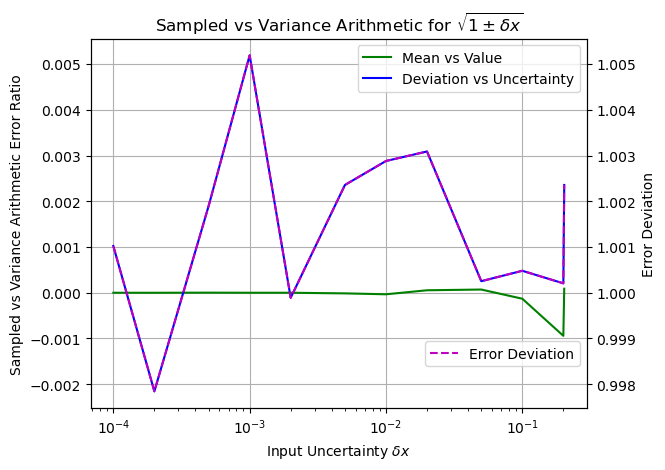

In [33]:
PlotCompare(topic=r'$\sqrt{1 \pm \delta x}$')

## Expansion

In [34]:
df = pd.read_csv("../Python/Output/PowerExpansion.txt", sep='\t')
df.head()

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
0,power,-1,1.0,0.19,2,1.000000,0.000000,3.610000e-02,1.604942e-35,0.036099,3.759893e-35,0.036099,1.618180e-35
1,power,-1,1.0,0.19,4,1.036099,0.036099,1.303210e-03,4.183152e-38,0.003909,1.131336e-36,0.010424,2.738582e-36
2,power,-1,1.0,0.19,6,1.040009,0.046524,4.704588e-05,8.177288e-41,0.000705,5.928567e-38,0.003244,2.596625e-37
3,power,-1,1.0,0.19,8,1.040714,0.049767,1.698356e-06,1.420896e-43,0.000178,5.198850e-39,0.001179,3.298049e-38
4,power,-1,1.0,0.19,10,1.040892,0.050946,6.131066e-08,2.314658e-46,0.000057,6.914483e-40,0.000499,5.753926e-39


In [35]:
df[(df['Input Uncertainty']==0.201) & (df['Order']>100)].head(10)

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
710,power,-1,1.0,0.201,102,1.046796,0.063580,8.433306e-72,3.566489e-173,3.929510e-07,3.339872e-43,0.000040,3.347753e-41
711,power,-1,1.0,0.201,104,1.046796,0.063620,3.407140e-73,5.935513e-176,3.893753e-07,3.344159e-43,0.000040,3.418931e-41
712,power,-1,1.0,0.201,106,1.046797,0.063660,1.376519e-74,9.874499e-179,3.860582e-07,3.351115e-43,0.000040,3.493064e-41
713,power,-1,1.0,0.201,108,1.046797,0.063700,5.561273e-76,1.642166e-181,3.829828e-07,3.360618e-43,0.000041,3.570180e-41
714,power,-1,1.0,0.201,110,1.046797,0.063741,2.246810e-77,2.730048e-184,3.801341e-07,3.372560e-43,0.000041,3.650317e-41
715,power,-1,1.0,0.201,112,1.046798,0.063783,9.077336e-79,4.537116e-187,3.774981e-07,3.386847e-43,0.000042,3.733517e-41
716,power,-1,1.0,0.201,114,1.046798,0.063825,3.667335e-80,7.537910e-190,3.750623e-07,3.403394e-43,0.000042,3.819825e-41
717,power,-1,1.0,0.201,116,1.046798,0.063867,1.481640e-81,1.251954e-192,3.728151e-07,3.422129e-43,0.000043,3.909293e-41
718,power,-1,1.0,0.201,118,1.046799,0.063910,5.985973e-83,2.078723e-195,3.707460e-07,3.442986e-43,0.000043,4.001979e-41
719,power,-1,1.0,0.201,120,1.046799,0.063953,2.418393e-84,3.450484e-198,3.688453e-07,3.465910e-43,0.000044,4.097941e-41


In [36]:
def PlotExpansion(topic, param, sInputUncertainty={0.201: '-', 0.200: ':', 0.199: '--'}):
    fig, ax = plt.subplots()
    ax.set_title('Taylor Expansion of Variance for ' + topic)
    ax.set_xlabel('Expansion Order')
    ax.set_ylabel('Taylor Expansion Terms')
    ax.set_yscale('log')
    ax.grid(True)
    
    for unc, style in sInputUncertainty.items():
        dfPlot = df[(df['Parameter']==param) & (df['Input Uncertainty']==unc)].sort_values('Order')
        ax.plot(dfPlot['Order'], dfPlot['New Variance Value'], c='black', ls=style, label=f'Variance $\delta x$={unc}')
        ax.plot(dfPlot['Order'], dfPlot['New Value Value'], c='gray', ls=style, label=f'Value $\delta x$={unc}')
        
    ax.legend(bbox_to_anchor=(1,1))


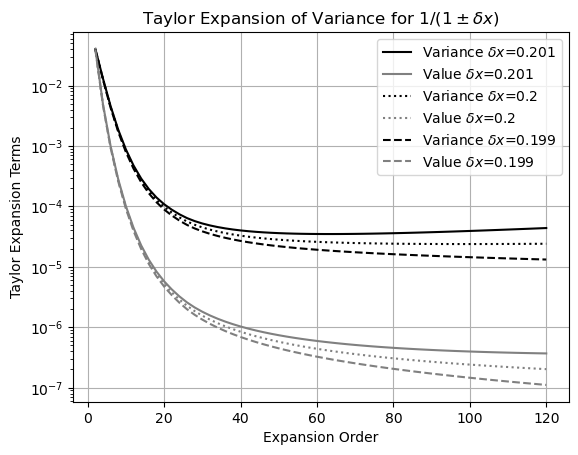

In [37]:
PlotExpansion(topic=r'$1/(1 \pm \delta x)$', param=-1)

# Sin

## PI

In [38]:
df = pd.read_csv("../Python/Output/SinAtPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0,0.0001,0.0,0.0001,8.030019e-07,0.000100,0.008030,1.003381,15,13,...,0.039811,0.030084,0.024268,0.016346,0.009828,0.007922,0.004713,0.003209,0.001103,0.000401
1,0,0.0002,0.0,0.0002,2.093365e-06,0.000198,0.010467,0.992071,20,16,...,0.041248,0.028904,0.020273,0.016359,0.011943,0.006724,0.003914,0.002509,0.001405,0.000201
2,0,0.0005,0.0,0.0005,7.057584e-06,0.000506,0.014115,1.011536,16,13,...,0.041019,0.030388,0.022064,0.017451,0.011032,0.007522,0.005215,0.002908,0.001705,0.000802
3,0,0.0010,0.0,0.0010,2.359217e-05,0.001011,0.023592,1.010941,15,12,...,0.041913,0.029580,0.022260,0.017146,0.011832,0.009024,0.005114,0.002206,0.001905,0.000602
4,0,0.0020,0.0,0.0020,6.140312e-06,0.001989,0.003070,0.994639,15,16,...,0.042432,0.033203,0.022068,0.014946,0.011736,0.006219,0.004414,0.002207,0.001404,0.000301


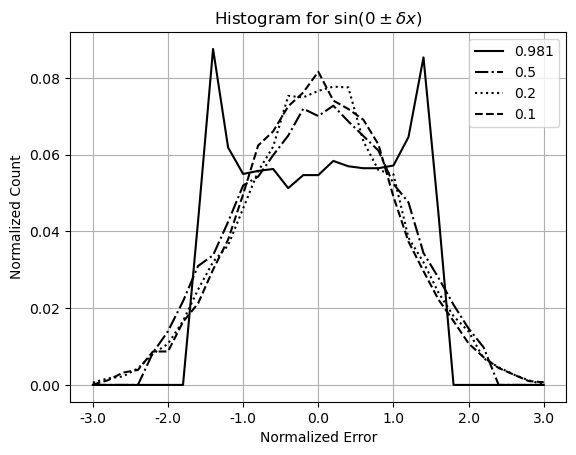

In [39]:
PlotHisto(topic=r'$\sin(0 \pm \delta x)$', sInput={0.981: 'k-', 0.5: 'k-.', 0.2: 'k:', 0.1: 'k--'})

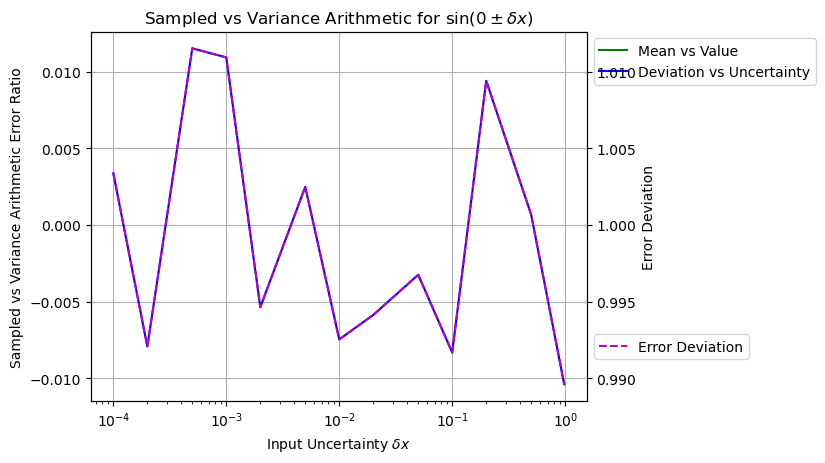

In [40]:
PlotCompare(topic=r'$\sin(0 \pm \delta x)$')

## PI/2

In [41]:
df = pd.read_csv("../Python/Output/SinAtHalfPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,1.570796,0.0001,1.000000,7.070430e-09,1.000000,0.000000e+00,-0.004951,1.030792,216,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.570796,0.0002,1.000000,2.828172e-08,1.000000,0.000000e+00,-0.001863,1.011204,235,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.570796,0.0005,1.000000,1.767607e-07,1.000000,1.753658e-07,-0.010704,1.021394,243,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.570796,0.0010,1.000000,7.070426e-07,0.999999,7.107401e-07,-0.006896,1.014349,227,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.570796,0.0020,0.999998,2.828166e-06,0.999998,2.902190e-06,-0.012652,1.025914,245,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


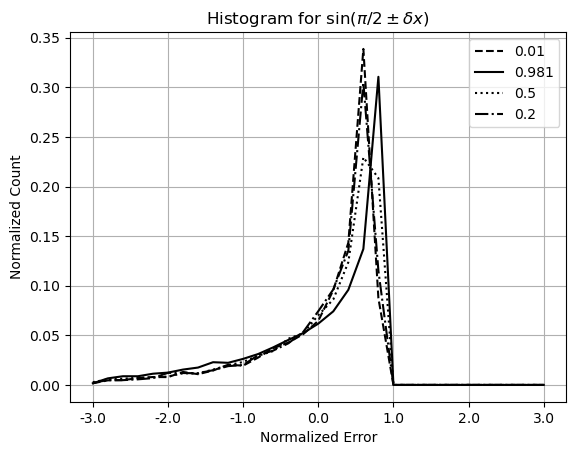

In [42]:
PlotHisto(topic=r'$\sin(\pi/2 \pm \delta x)$', sInput={0.981: 'k-', 0.5: 'k:', 0.2: 'k-.', 0.01: 'k--'})

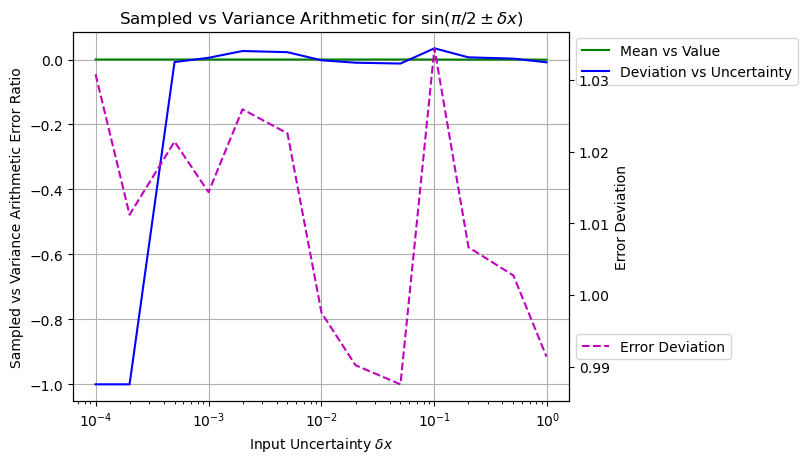

In [43]:
PlotCompare(topic=r'$\sin(\pi/2 \pm \delta x)$')

## PI/4

In [44]:
df = pd.read_csv("../Python/Output/SinAtQuarterPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.785398,0.0001,0.707107,0.000071,0.707106,0.000071,-0.008028,1.003886,16,11,...,0.039106,0.030382,0.023764,0.015843,0.010428,0.006417,0.003710,0.002206,0.001705,0.000501
1,0.785398,0.0002,0.707107,0.000141,0.707107,0.000142,0.002480,1.000879,18,13,...,0.040927,0.025680,0.023072,0.016250,0.011435,0.008426,0.003812,0.003310,0.001605,0.000702
2,0.785398,0.0005,0.707107,0.000354,0.707112,0.000353,0.014126,0.999453,11,10,...,0.037880,0.031967,0.024451,0.015733,0.010823,0.007716,0.005111,0.002205,0.002104,0.000501
3,0.785398,0.0010,0.707106,0.000707,0.707107,0.000699,0.001502,0.988690,9,11,...,0.034569,0.029459,0.022645,0.015531,0.012525,0.006713,0.003607,0.002806,0.002004,0.000701
4,0.785398,0.0020,0.707105,0.001414,0.707095,0.001427,-0.007421,1.009387,13,12,...,0.036491,0.029173,0.022456,0.014737,0.010125,0.008120,0.004712,0.003208,0.002607,0.001103


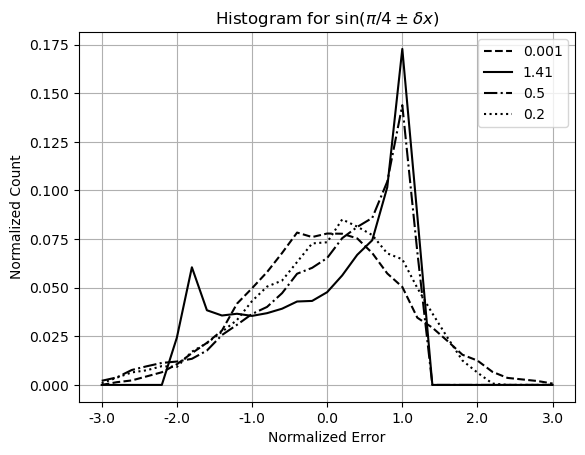

In [45]:
PlotHisto(topic=r'$\sin(\pi/4 \pm \delta x)$', sInput={1.41: 'k-', 0.2: 'k:', 0.5: 'k-.', 0.001: 'k--'})

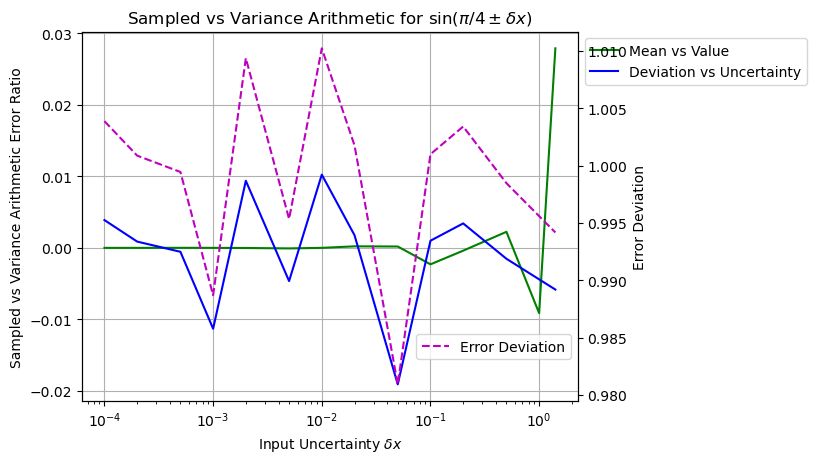

In [46]:
PlotCompare(topic=r'$\sin(\pi/4 \pm \delta x)$')